# Regression

* We have been hired to predict house prices
* We have analyzed data and learnt about preprocessing
* Let us apply what we have learnt to predict prices!

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/instituteofai/ML-101/master/Datasets/cal_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
df.shape

(20640, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
labels=df[['median_house_value']]
features=df[['population', 'total_rooms']]

In [22]:
features.head()

,population,total_rooms
0,322.0,880.0
1,2401.0,7099.0
2,496.0,1467.0
3,558.0,1274.0
4,565.0,1627.0


In [23]:
labels.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [27]:
# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [31]:
print(f'X_train => {X_train.shape}')
print(f'y_train => {y_train.shape}')
print('--------')
print(f'X_test => {X_test.shape}')
print(f'y_test => {y_test.shape}')

X_train => (16512, 2)
y_train => (16512, 1)
--------
X_test => (4128, 2)
y_test => (4128, 1)


In [32]:
from sklearn import linear_model

model = linear_model.LinearRegression()

# Calculate the "parameters" of "model" based on data we've given
model.fit(features, labels)

# Take features as input, and predict the output
predictions = model.predict(features)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(labels, predictions, squared=False)
r2 = r2_score(labels, predictions)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 109988.05825894055
R-squared: 0.09148208979947192


## Model after train-test split

In [33]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train) # model training = finding parameters

predictions = model.predict(X_test) # true values => y_test

In [34]:
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 109566.00094398623
R-squared: 0.0838960383976628


## Add more features

In [35]:
labels=df[['median_house_value']]
features=df[['population', 'total_rooms', 'longitude', 'latitude', 'housing_median_age', 'households', 'median_income']]

In [36]:
features.head()

,population,total_rooms,longitude,latitude,housing_median_age,households,median_income
0,322.0,880.0,-122.23,37.88,41.0,126.0,8.3252
1,2401.0,7099.0,-122.22,37.86,21.0,1138.0,8.3014
2,496.0,1467.0,-122.24,37.85,52.0,177.0,7.2574
3,558.0,1274.0,-122.25,37.85,52.0,219.0,5.6431
4,565.0,1627.0,-122.25,37.85,52.0,259.0,3.8462


In [37]:
labels.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 70517.83385627995
R-squared: 0.6205180997418556


## Impute missing values in 'total_bedrooms' column

In [46]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

new_df = pd.DataFrame(imputer.fit_transform(df[['total_bedrooms']]))
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [48]:
imputer.statistics_

array([435.])

In [49]:
labels=df[['median_house_value']]
features=df[['population', 'total_rooms', 'longitude', 'latitude', 'housing_median_age', 'households', 'median_income']]

features.loc[:, 'total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

/Users/ravimashru/scratch/ml-course-content/venv/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ravimashru/scratch/ml-course-content/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [51]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   population          20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   longitude           20640 non-null  float64
 3   latitude            20640 non-null  float64
 4   housing_median_age  20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   total_bedrooms      20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [52]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 71133.17349286027
R-squared: 0.6138664756435175


## Encode Ocean Proximity

In [54]:
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

encoder.fit(df['ocean_proximity'])

encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [55]:
encoder.transform(df['ocean_proximity'])

array([3, 3, 3, ..., 1, 1, 1])

In [56]:
encoder.fit_transform(df['ocean_proximity'])

array([3, 3, 3, ..., 1, 1, 1])

In [57]:
features.loc[:, 'ocean_proximity'] = encoder.fit_transform(df['ocean_proximity'])

/Users/ravimashru/scratch/ml-course-content/venv/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/ravimashru/scratch/ml-course-content/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [58]:
features.head()

,population,total_rooms,longitude,latitude,housing_median_age,households,median_income,total_bedrooms,ocean_proximity
0,322.0,880.0,-122.23,37.88,41.0,126.0,8.3252,129.0,3
1,2401.0,7099.0,-122.22,37.86,21.0,1138.0,8.3014,1106.0,3
2,496.0,1467.0,-122.24,37.85,52.0,177.0,7.2574,190.0,3
3,558.0,1274.0,-122.25,37.85,52.0,219.0,5.6431,235.0,3
4,565.0,1627.0,-122.25,37.85,52.0,259.0,3.8462,280.0,3


In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 71147.87146118363
R-squared: 0.6137068886499548


## Relationship between ocean_proximity values

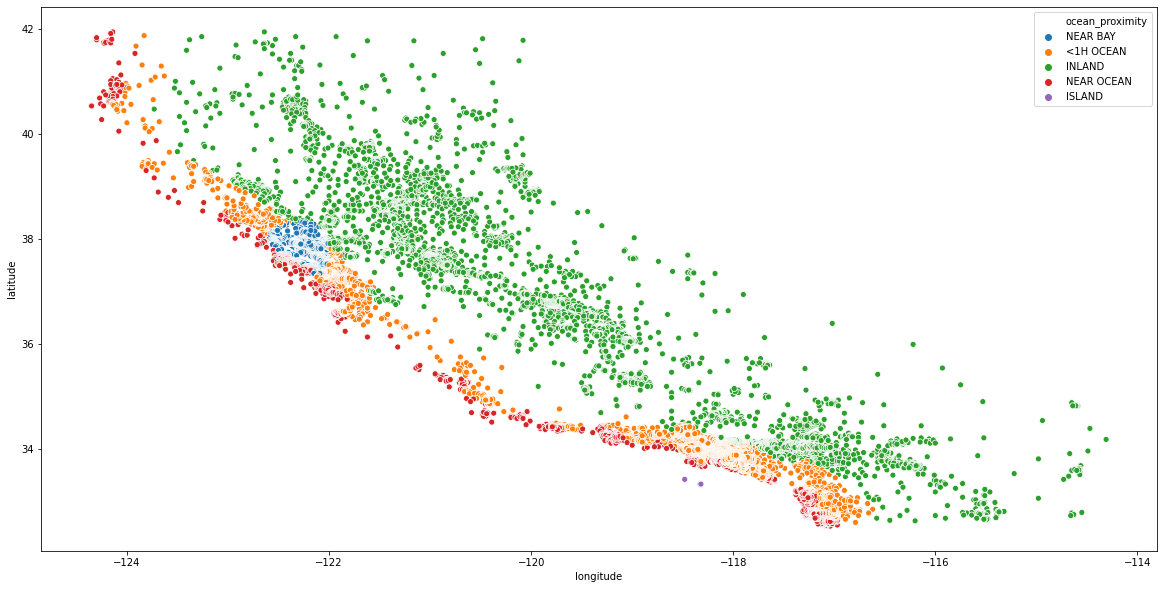

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', data=df, ax=ax)

In [61]:
proximity_map = {
    'ISLAND': 0,
    'NEAR OCEAN': 1,
    'NEAR BAY': 2,
    '<1H OCEAN': 3,
    'INLAND': 4
}

features.loc[:, 'ocean_proximity'] = df['ocean_proximity'].map(proximity_map)
features.head()

/Users/ravimashru/scratch/ml-course-content/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,population,total_rooms,longitude,latitude,housing_median_age,households,median_income,total_bedrooms,ocean_proximity
0,322.0,880.0,-122.23,37.88,41.0,126.0,8.3252,129.0,2
1,2401.0,7099.0,-122.22,37.86,21.0,1138.0,8.3014,1106.0,2
2,496.0,1467.0,-122.24,37.85,52.0,177.0,7.2574,190.0,2
3,558.0,1274.0,-122.25,37.85,52.0,219.0,5.6431,235.0,2
4,565.0,1627.0,-122.25,37.85,52.0,259.0,3.8462,280.0,2


In [62]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 70646.31920325855
R-squared: 0.619133987950196


## One Hot Encoding!

In [63]:
onehot_encoder = preprocessing.OneHotEncoder(sparse=False)
onehot_encoder.fit_transform(df[['ocean_proximity']])

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [66]:
# Remove the current "ocean_proximity" column
features.drop('ocean_proximity', axis=1, inplace=True)
features.head()

/Users/ravimashru/scratch/ml-course-content/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,population,total_rooms,longitude,latitude,housing_median_age,households,median_income,total_bedrooms
0,322.0,880.0,-122.23,37.88,41.0,126.0,8.3252,129.0
1,2401.0,7099.0,-122.22,37.86,21.0,1138.0,8.3014,1106.0
2,496.0,1467.0,-122.24,37.85,52.0,177.0,7.2574,190.0
3,558.0,1274.0,-122.25,37.85,52.0,219.0,5.6431,235.0
4,565.0,1627.0,-122.25,37.85,52.0,259.0,3.8462,280.0


In [67]:
onehot_encoder.get_feature_names()

array(['x0_<1H OCEAN', 'x0_INLAND', 'x0_ISLAND', 'x0_NEAR BAY',
       'x0_NEAR OCEAN'], dtype=object)

In [68]:
df_ocean_proximity = pd.DataFrame(onehot_encoder.fit_transform(df[['ocean_proximity']]), columns=onehot_encoder.get_feature_names(), dtype=int)
df_ocean_proximity.head()

,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [70]:
features = pd.concat([features, df_ocean_proximity], axis=1)
features.head()

,population,total_rooms,longitude,latitude,housing_median_age,households,median_income,total_bedrooms,x0_<1H OCEAN,x0_INLAND,x0_ISLAND,x0_NEAR BAY,x0_NEAR OCEAN
0,322.0,880.0,-122.23,37.88,41.0,126.0,8.3252,129.0,0,0,0,1,0
1,2401.0,7099.0,-122.22,37.86,21.0,1138.0,8.3014,1106.0,0,0,0,1,0
2,496.0,1467.0,-122.24,37.85,52.0,177.0,7.2574,190.0,0,0,0,1,0
3,558.0,1274.0,-122.25,37.85,52.0,219.0,5.6431,235.0,0,0,0,1,0
4,565.0,1627.0,-122.25,37.85,52.0,259.0,3.8462,280.0,0,0,0,1,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 70060.5218447353
R-squared: 0.6254240620553595
